# **MNIST DATASET**

**Importing Data Set**

---



In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file
  
 #MNIST 
File_ID = '1EinH3Q28iwbM9SUceTEiTxz-_KkJXmIh'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('mnist_train.csv')
train_data = pd.read_csv('mnist_train.csv',delimiter=",",header=None)
train_data = pd.DataFrame(train_data).as_matrix()


File_ID = '1HT80t8kyEn9Fvp80OPfpVb1PlsfN5a6o'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('mnist_test.csv')
test_data = pd.read_csv('mnist_test.csv',delimiter=",",header=None)
test_data = pd.DataFrame(test_data).as_matrix()


**One-Hot Function**

---



In [0]:
def one_hot(a):
  a=a.reshape(a.shape[0]).astype(int)
  b = np.ones((a.shape[0], different_labels))*0.0
  b[np.arange(a.shape[0]), a] =1
  return b

**Normalization**

---



In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 # width and length
different_labels = 10 # [0-9]
image_pixels = image_size * image_size


print('BEFORE NORMALIZATION')
print(train_data[0][150:200])

#normalize the data
norm = 255
train_imgs = np.asfarray(train_data[:,1:]) / norm  #train input
test_imgs = np.asfarray(test_data[:, 1:]) / norm  #test input
train_labels = np.asfarray(train_data[:, :1])  #train output
test_labels = np.asfarray(test_data[:, :1])  #test output


print('\nAFTER NORMALIZATION')
print(train_imgs[0][150:200])


BEFORE NORMALIZATION
[  0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0
   0   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
 253 225 172 253 242 195  64   0   0   0   0   0   0   0]

AFTER NORMALIZATION
[0.         0.         0.01176471 0.07058824 0.07058824 0.07058824
 0.49411765 0.53333333 0.68627451 0.10196078 0.65098039 1.
 0.96862745 0.49803922 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.11764706 0.14117647 0.36862745 0.60392157
 0.66666667 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235294 0.6745098  0.99215686 0.94901961 0.76470588 0.25098039
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


**ONE-HOT ENCODING **

---




LABELS
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]

COUNTS
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]

ONE_HOT ENCODING OF LABELS
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 



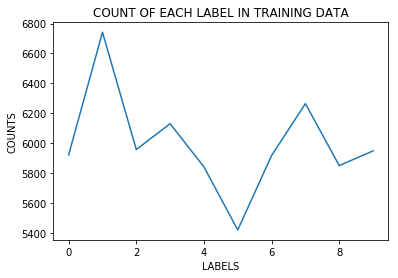

In [58]:
#ONE-HOT ENCODING

train_1_hot=one_hot(train_labels)
test_1_hot=one_hot(test_labels)


labels,count=np.unique(train_labels,return_counts=True)

print('\nLABELS\n',labels)
print('\nCOUNTS\n',count)
print('\nONE_HOT ENCODING OF LABELS\n',one_hot(labels),'\n')

plt.plot(labels,count)
plt.xlabel('LABELS')
plt.ylabel('COUNTS')
plt.title('COUNT OF EACH LABEL IN TRAINING DATA')
plt.show()

**Initialize Weights **

---



In [0]:
def initialize_weights():        
  weights_matrices = []        
  layer_index = 1
  no_of_layers = len(structure)
  while layer_index < no_of_layers:
    nodes_in = structure[layer_index-1]
    nodes_out = structure[layer_index]
    wm=np.random.rand(nodes_out,nodes_in+1)*np.sqrt(2/nodes_in)
    weights_matrices.append(wm)
    layer_index += 1
  return weights_matrices

**Activation-Function**

---



In [0]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

**Forward And Backward Propogation**

---



In [0]:
#Forward and Backward Propogation
def train(input_vector, output_vector):
                   
  #Forward Propogation
  no_of_layers = len(structure)        
  input_vector = np.array(input_vector, ndmin=2).T        
  layer_index = 0        
  in_vectors = [input_vector]    #stores the input vector at each layer 
        
  while layer_index < no_of_layers - 1:
    # adding bias node to the end of the 'input'_vector
    in_vectors[-1] = np.concatenate( (in_vectors[-1],[[1]]) )
    net = np.dot(weights_matrices[layer_index], in_vectors[-1])
    out = activation_function(net)
    in_vectors.append(out)   
    layer_index += 1        
        
        
        
  #Backward Propogation
  layer_index = no_of_layers - 1
  output_vector = np.array(output_vector, ndmin=2).T
  # The input vectors to the various layers
  output_errors = output_vector - out  
  while layer_index > 0:
    out = in_vectors[layer_index]
    ins = in_vectors[layer_index-1]
    if not layer_index==(no_of_layers-1):
      out = out[:-1,:].copy()
    tmp = output_errors * out * (1.0 - out)     
    tmp = np.dot(tmp, ins.T)
                  
    weights_matrices[layer_index-1] += learning_rate * tmp
    output_errors = np.dot(weights_matrices[layer_index-1].T,output_errors)
    output_errors = output_errors[:-1,:]
    layer_index -= 1
       

**Accuracy Function**

---



In [0]:
def accuracy(imgs,output):
  crct = 0
  clist=[]
  for i in range(len(imgs)):
    predicted= (cost_function(imgs[i]))[1]
    if predicted == output[i]:
      crct += 1
      clist.append(1)
    else:
      clist.append(0)
  return((crct / len(imgs)),clist)    

**Cost_Function**

---



In [0]:
def cost_function(image):
  no_of_layers = len(structure)
  # adding bias node to the end of the input_vector
  image = np.concatenate( (image,[1]) )
  ins = np.array(image, ndmin=2).T
  layer_index = 1
  # The input vectors to the various layers
  while layer_index < no_of_layers:
    net = np.dot(weights_matrices[layer_index-1],ins)
    out = activation_function(net)   
    ins = out
    ins = np.concatenate( (ins,[[1]]) )          
    layer_index += 1
  return (np.max(out),np.argmax(out))
  #print('Actual=',ans,' Prediction=', np.argmax(out_vector), ' Value',np.max(out_vector))
    

**Main Function**

---



In [59]:
#initialization
structure=[image_pixels,128,128,different_labels]
learning_rate = 0.1
weights_matrices=initialize_weights()

epochs=10
acc=[]
e=[]
for epoch in range(epochs):  
  for i in range(len(train_imgs)):
    train(train_imgs[i], train_1_hot[i])
  print('EPOCH=',epoch+1,'Accuracy=',end=' ')
  acc.append((accuracy(test_imgs,test_labels))[0])
  e.append(epoch)
  print(acc[epoch])



EPOCH= 1 Accuracy= 0.8831
EPOCH= 2 Accuracy= 0.8975


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


EPOCH= 3 Accuracy= 0.9077
EPOCH= 4 Accuracy= 0.9018
EPOCH= 5 Accuracy= 0.896
EPOCH= 6 Accuracy= 0.9131
EPOCH= 7 Accuracy= 0.8984
EPOCH= 8 Accuracy= 0.9138
EPOCH= 9 Accuracy= 0.9024
EPOCH= 10 Accuracy= 0.9107


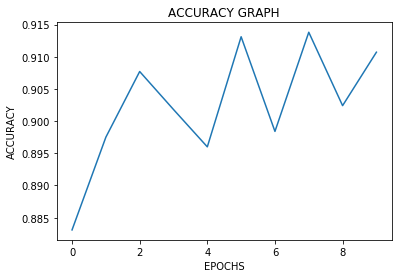

In [61]:
plt.plot(e,acc)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.title('ACCURACY GRAPH')
plt.show()

In [62]:
#Predicting Value
for i in range(5):
  highest,predicted=cost_function(test_imgs[i])
  print('predicted=',predicted,' value=',highest,' actual=',int(test_labels[i][0]))

predicted= 7  value= 0.9996541239024191  actual= 7
predicted= 2  value= 0.9590401624951768  actual= 2
predicted= 1  value= 0.9997702032417608  actual= 1
predicted= 0  value= 0.9945531770028281  actual= 0
predicted= 4  value= 0.9838444869734042  actual= 4


Image showing Error

Predicted: 6  actual: 5


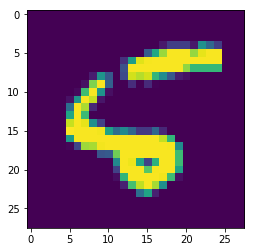

In [63]:
plt.imshow(test_imgs[8].reshape(28,28))
print('Predicted:',cost_function(test_imgs[8])[1],' actual:',int(test_labels[8][0]))

In [64]:
c=[]
a,c=(accuracy(test_imgs,test_labels))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


Visulaizing the errors in 10 test images

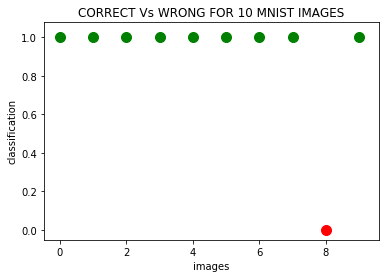

In [65]:
n=10
l= list(range(n))
colors=['red','green']
for i in range(n):
    plt.scatter(l[i],c[i], s=100, color = colors[c[i]])
plt.xlabel('images')
plt.ylabel('classification')
plt.title('CORRECT Vs WRONG FOR 10 MNIST IMAGES')
plt.show()

Visulaizing the errors in 100 test images

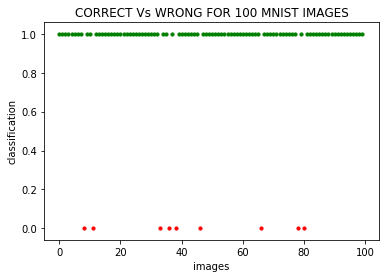

In [66]:
n=100
l= list(range(n))
colors=['red','green']
for i in range(n):
    plt.scatter(l[i],c[i], s=10, color = colors[c[i]])
plt.xlabel('images')
plt.ylabel('classification')
plt.title('CORRECT Vs WRONG FOR 100 MNIST IMAGES')
plt.show()

Visulaizing the errors in 1000 test images

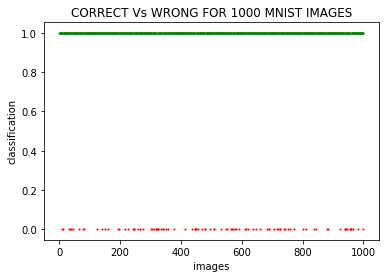

In [67]:
n=1000
l= list(range(n))
colors=['red','green']
for i in range(n):
    plt.scatter(l[i],c[i], s=1, color = colors[c[i]])
plt.xlabel('images')
plt.ylabel('classification')
plt.title('CORRECT Vs WRONG FOR 1000 MNIST IMAGES')
plt.show()

# EMNIST FASHION DATASET

In [0]:
#Fashion Mnist

File_ID = '1n3PiMWjovXHemzn3GqtCzByM7HmY-ilt'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('fashion-mnist_train.csv')
train_data = pd.read_csv('fashion-mnist_train.csv',delimiter=",")
train_data = pd.DataFrame(train_data).as_matrix()

File_ID = '1HK7KkZI05DhNHk8doIPSeEF_vN9RCMAU'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('fashion-mnist_test.csv')
test_data = pd.read_csv('fashion-mnist_test.csv',delimiter=",")
test_data = pd.DataFrame(test_data).as_matrix()


**Normalization for Fashion**

---



In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 # width and length
different_labels = 10 # [0-9]
image_pixels = image_size * image_size


print('BEFORE NORMALIZATION')
print(train_data[0][150:200])

#normalize the data
norm = 255
train_imgs = np.asfarray(train_data[:,1:]) / norm  #train input
test_imgs = np.asfarray(test_data[:, 1:]) / norm  #test input
train_labels = np.asfarray(train_data[:, :1])  #train output
test_labels = np.asfarray(test_data[:, :1])  #test output


print('\nAFTER NORMALIZATION')
print(train_imgs[0][150:200])


BEFORE NORMALIZATION
[224 215 215 229 108 180 207 214 224 231 249 254  45   0   0   0   0   0
   0   0   0   1   0   0 214 222 210 213 224 225 217 220 254 233 219 221
 217 223 221 240 254   0   0   1   0   0   0   1   0   0]

AFTER NORMALIZATION
[0.84313725 0.84313725 0.89803922 0.42352941 0.70588235 0.81176471
 0.83921569 0.87843137 0.90588235 0.97647059 0.99607843 0.17647059
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00392157 0.         0.         0.83921569
 0.87058824 0.82352941 0.83529412 0.87843137 0.88235294 0.85098039
 0.8627451  0.99607843 0.91372549 0.85882353 0.86666667 0.85098039
 0.8745098  0.86666667 0.94117647 0.99607843 0.         0.
 0.00392157 0.         0.         0.         0.00392157 0.
 0.         0.        ]


**ONE-HOT ENCODING FOR FASHION **

---




LABELS
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]

COUNTS
 [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]

ONE_HOT ENCODING OF LABELS
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 



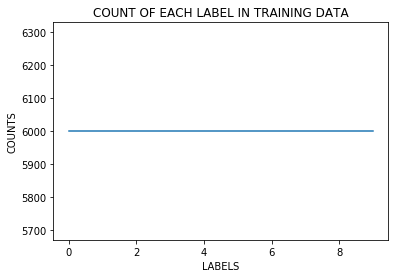

In [70]:
#ONE-HOT ENCODING

train_1_hot=one_hot(train_labels)
test_1_hot=one_hot(test_labels)


labels,count=np.unique(train_labels,return_counts=True)

print('\nLABELS\n',labels)
print('\nCOUNTS\n',count)
print('\nONE_HOT ENCODING OF LABELS\n',one_hot(labels),'\n')

plt.plot(labels,count)
plt.xlabel('LABELS')
plt.ylabel('COUNTS')
plt.title('COUNT OF EACH LABEL IN TRAINING DATA')
plt.show()

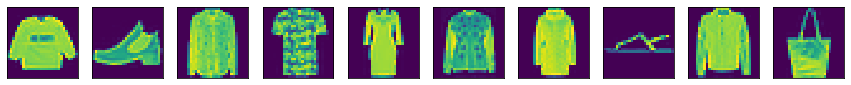

  2          9          6          0          3          4          4          5          4          8          

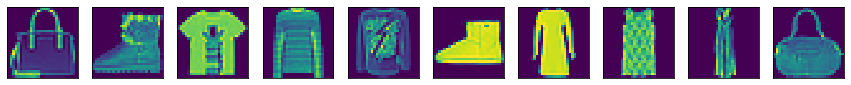

  8          9          0          2          2          9          3          3          3          8          

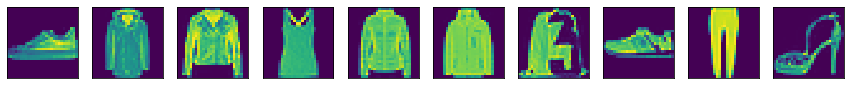

  7          4          4          0          4          4          8          7          1          5          

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for i in range(10):
  ax = plt.subplot(1,10,i+1)
  plt.imshow(train_imgs[i].reshape(28,28),cmap='viridis')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print(' ',end=' ')
for i in range(10):
  print(int(train_labels[i][0]),end='          ')
  
plt.figure(figsize=(15, 15))
for i in range(11,21):
  ax = plt.subplot(1,10,i-10)
  plt.imshow(train_imgs[i].reshape(28,28),cmap='viridis')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print(' ',end=' ')
for i in range(11,21):
  print(int(train_labels[i][0]),end='          ')

  
plt.figure(figsize=(15, 15))
for i in range(21,31):
  ax = plt.subplot(1,10,i-20)
  plt.imshow(train_imgs[i].reshape(28,28),cmap='viridis')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print(' ',end=' ')
for i in range(21,31):
  print(int(train_labels[i][0]),end='          ')

In [39]:
#initialization
structure=[image_pixels,128,128,different_labels]
learning_rate = 0.1
weights_matrices=initialize_weights()

epochs=10
acc=[]
e=[]
for epoch in range(epochs):  
  for i in range(len(train_imgs)):
    train(train_imgs[i], train_1_hot[i])
  print('EPOCH=',epoch+1,'Accuracy=',end=' ')
  acc.append((accuracy(test_imgs,test_labels))[0])
  e.append(epoch)
  print(acc[epoch])

EPOCH= 1 Accuracy= 0.6855


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


EPOCH= 2 Accuracy= 0.676
EPOCH= 3 Accuracy= 0.6872
EPOCH= 4 Accuracy= 0.6127
EPOCH= 5 Accuracy= 0.7186
EPOCH= 6 Accuracy= 0.7441
EPOCH= 7 Accuracy= 0.6901
EPOCH= 8 Accuracy= 0.6728
EPOCH= 9 Accuracy= 0.6858
EPOCH= 10 Accuracy= 0.7189


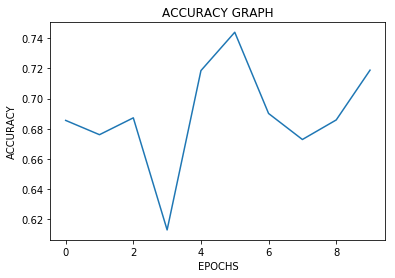

In [40]:
plt.plot(e,acc)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.title('ACCURACY GRAPH')
plt.show()

In [48]:
#Predicting Value

for i in range(10):
  highest,predicted=cost_function(test_imgs[i])
  print('predicted=',predicted,' value=',highest,' actual=',int(test_labels[i][0]))


predicted= 0  value= 0.7136874619011491  actual= 0
predicted= 1  value= 0.9930232707516224  actual= 1
predicted= 2  value= 0.48307269559649096  actual= 2
predicted= 2  value= 0.3037717772060379  actual= 2
predicted= 2  value= 0.34652339344444993  actual= 3
predicted= 2  value= 0.39381834852177333  actual= 2
predicted= 8  value= 0.9872982895026149  actual= 8
predicted= 6  value= 0.34495635749198167  actual= 6
predicted= 5  value= 0.9750888839967796  actual= 5
predicted= 0  value= 0.7136874619041425  actual= 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


Image showing Error

Predicted: 2  actual: 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


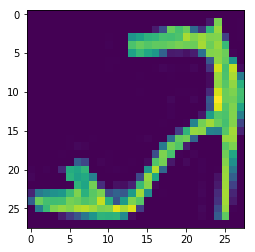

In [43]:
plt.imshow(test_imgs[8].reshape(28,28))
print('Predicted:',cost_function(test_imgs[4])[1],' actual:',int(test_labels[4][0]))

In [60]:
c=[]
a,c=(accuracy(test_imgs,test_labels))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


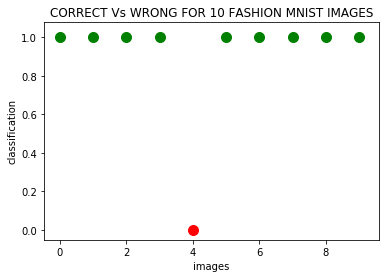

In [49]:
n=10
l= list(range(n))
colors=['red','green']
for i in range(n):
    plt.scatter(l[i],c[i], s=100, color = colors[c[i]])
plt.xlabel('images')
plt.ylabel('classification')
plt.title('CORRECT Vs WRONG FOR 10 FASHION MNIST IMAGES')
plt.show()

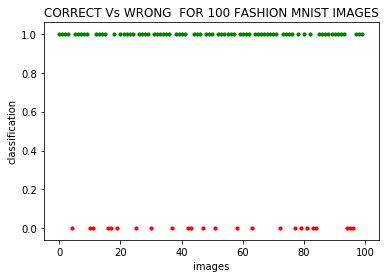

In [50]:
n=100
l= list(range(n))
colors=['red','green']
for i in range(n):
    plt.scatter(l[i],c[i], s=10, color = colors[c[i]])
plt.xlabel('images')
plt.ylabel('classification')
plt.title('CORRECT Vs WRONG  FOR 100 FASHION MNIST IMAGES')
plt.show()

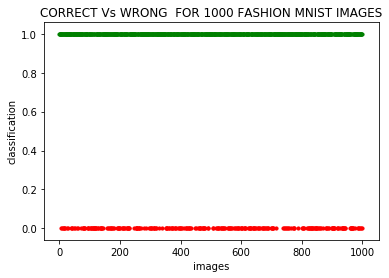

In [51]:
n=1000
l= list(range(n))
colors=['red','green']
for i in range(n):
    plt.scatter(l[i],c[i], s=10, color = colors[c[i]])
plt.xlabel('images')
plt.ylabel('classification')
plt.title('CORRECT Vs WRONG  FOR 1000 FASHION MNIST IMAGES')
plt.show()

# INBUILT FUNCTION



In [0]:
!pip install tensorflow

11493376/11490434 [==============================] - 0s 0us/step


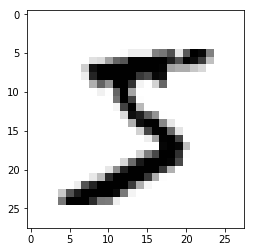

5


In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()


plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(y_train[0])


x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [0]:
x_input = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_output = x_test.reshape((x_test.shape[0],  x_test.shape[1]*x_test.shape[2]))

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_input, y_train, epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 9s 145us/sample - loss: 0.5273 - acc: 0.8569
Epoch 2/3
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2246 - acc: 0.9331
Epoch 3/3
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1683 - acc: 0.9489


In [0]:
val_loss, val_acc = model.evaluate(x_output, y_test)  # evaluate the out of sample data with model
#print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

model.save('output.model')
new_model = tf.keras.models.load_model('output.model')
predictions = new_model.predict(x_output)
#predictions

import numpy as np
for i in range(5):
  print('predicted=',np.argmax(predictions[i]),'actual=',y_test[i])

10000/10000 [==============================] - 1s 53us/sample - loss: 0.1616 - acc: 0.9514
0.9514
predicted= 7 actual= 7
predicted= 2 actual= 2
predicted= 1 actual= 1
predicted= 0 actual= 0
predicted= 4 actual= 4
